## Assignment 2
### Manav Jain
### 20BCE1404

### 1. Download the dataset:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the dataset.

In [3]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\smart_bridge\titanic.csv")

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Perform Below Visualizations.
    ● Univariate Analysis
    ● Bi - Variate Analysis
    ● Multi - Variate Analysis

#### Univariate

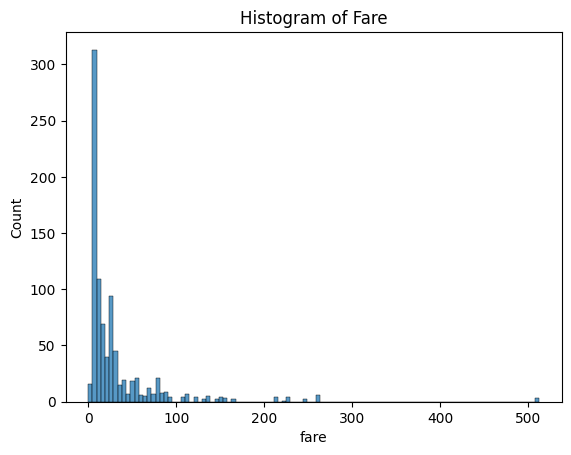

In [5]:
sns.histplot(data['fare']).set(title = 'Histogram of Fare')
plt.show()

#### Bivariate

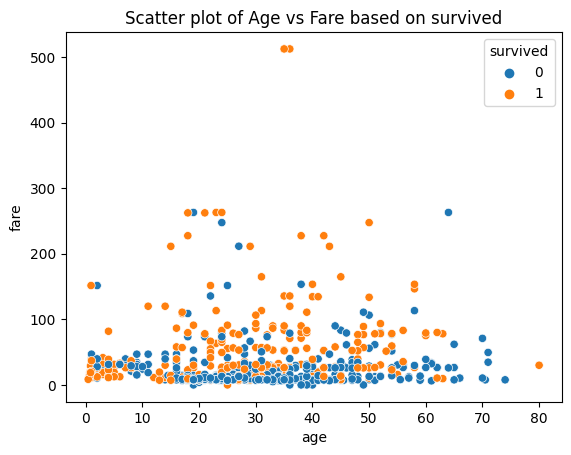

In [196]:
sns.scatterplot(x='age', y='fare', hue='survived', data=data).set(title = 'Scatter plot of Age vs Fare based on survived')
plt.show()

#### Multivariate

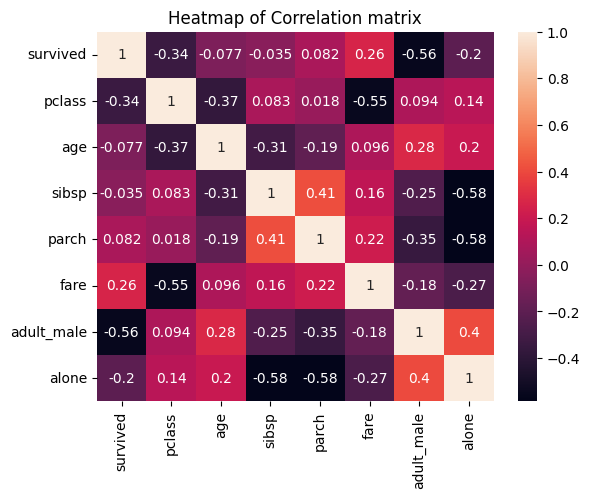

In [197]:
# Corrplot
sns.heatmap(data.corr(), annot=True).set(title = 'Heatmap of Correlation matrix')
plt.show()

### 4. Perform descriptive statistics on the dataset

In [198]:
# For numerical variables
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
# For categorical variables
data.describe(include='object')

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


### 5. Handle the Missing values.

In [200]:
### Finding varaibles that have missing values
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Classes age, embarked, deck ,embark_town have null values

In [201]:
# replacing null values with meadian for class age (outliers can result in bad mean)
data['age'].fillna(data['age'].median(), inplace=True)

In [202]:
# removing column deck, as most of it consists of null values, imlying that it cant contribute significantly
data = data.drop(['deck'], axis = 1)

In [203]:
# for rest, remving rows having null values
data = data.dropna()

In [204]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [205]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### 6. Find the outliers and replace the outliers

For age column

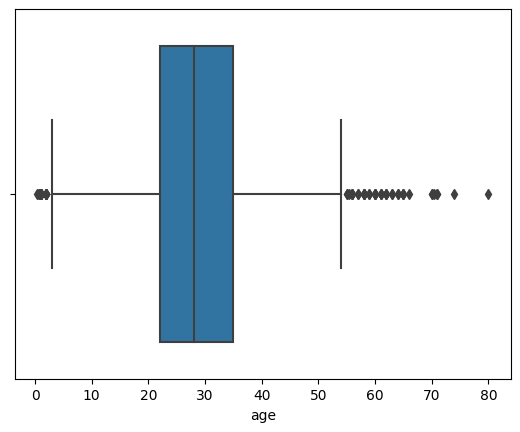

In [206]:
sns.boxplot(x = 'age', data = data)
plt.show()

In [207]:
# Replacing outliers in 'age' column with the 90th percentile
age_threshold = data['age'].quantile(0.90)
data.loc[data['age'] > age_threshold, 'age'] = age_threshold

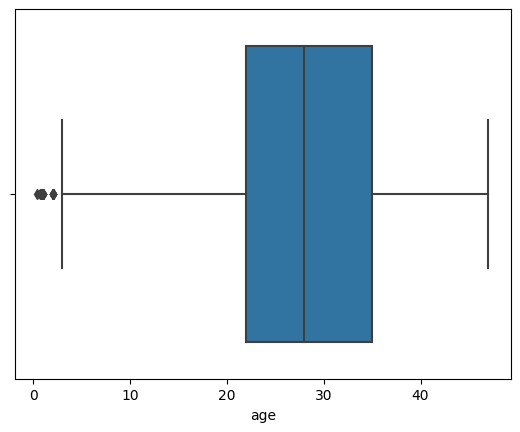

In [208]:
sns.boxplot(x = 'age', data = data)
plt.show()

For fare column

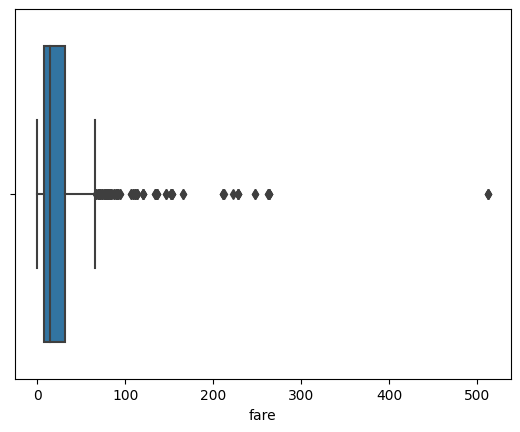

In [209]:
sns.boxplot(x = 'fare', data = data)
plt.show()

In [210]:
# Replacing outliers in 'Fare' column with the 95th percentile
fare_threshold = data['fare'].quantile(0.90)
data.loc[data['fare'] > fare_threshold, 'fare'] = fare_threshold

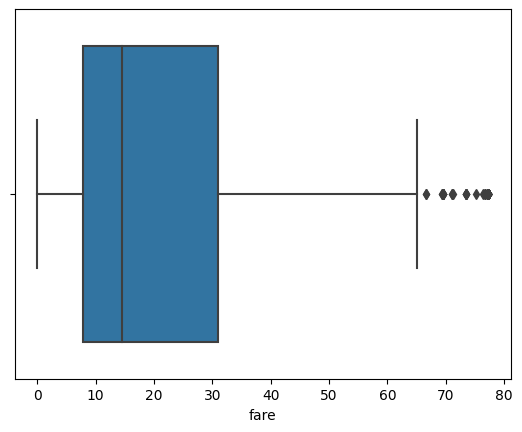

In [211]:
sns.boxplot(x = 'fare', data = data)
plt.show()

### 7. Check for Categorical columns and perform encoding.

In [212]:
# Categorical classes
data.dtypes[data.dtypes == 'object']

sex            object
embarked       object
class          object
who            object
embark_town    object
alive          object
dtype: object

In [213]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [214]:
# Using label encoder for encoding above classes
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [215]:
columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'alone', 'adult_male']

for col in columns:
    data[col] = le.fit_transform(data[col])
    
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [216]:
data['sex'].unique()

array([1, 0])

### 8. Split the data into dependent and independent variables.

In [217]:
# Independent variables
X = data.drop('survived', axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


In [218]:
# Dependent variable
Y = data['survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

### 9. Scale the independent variables

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [221]:
X[:5]

array([[ 0.82520863,  0.73534203, -0.57851914,  0.43135024, -0.47432585,
        -0.77570004,  0.58683958,  0.82520863, -0.35255865,  0.80962552,
         0.58683958, -0.78696114, -1.22934919],
       [-1.57221121, -1.35991138,  0.86080421,  0.43135024, -0.47432585,
         1.97657163, -1.93955453, -1.57221121,  1.33252006, -1.23513893,
        -1.93955453,  1.27071078, -1.22934919],
       [ 0.82520863, -1.35991138, -0.21868831, -0.47519908, -0.47432585,
        -0.74668727,  0.58683958,  0.82520863,  1.33252006, -1.23513893,
         0.58683958,  1.27071078,  0.81343853],
       [-1.57221121, -1.35991138,  0.59093108,  0.43135024, -0.47432585,
         1.1950192 ,  0.58683958, -1.57221121,  1.33252006, -1.23513893,
         0.58683958,  1.27071078, -1.22934919],
       [ 0.82520863,  0.73534203,  0.59093108, -0.47519908, -0.47432585,
        -0.74131454,  0.58683958,  0.82520863, -0.35255865,  0.80962552,
         0.58683958, -0.78696114,  0.81343853]])

### 10. Split the data into training and testing

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
# using a 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [224]:
len(X_train)

711

In [225]:
len(Y_train)

711

In [226]:
len(X_test)

178

In [227]:
len(Y_test)

178

Therefore using a 80 -20 split, we get 711 observations for training and 178 observations for testing